In [ ]:
# Pymaceuticals Inc.

### Analysis

In [387]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Prepare the Data

In [133]:
# Source study data files
mouse_metadata_path = "Starter_Code/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Starter_Code/Pymaceuticals/data/Study_results.csv"

In [134]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv (study_results_path)
study_results.head(1)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0


In [135]:
mouse_metadata.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16


In [155]:
# Combine the data into a single DataFrame
merged_data_df = pd.merge(study_results,mouse_metadata, how = "outer", on = "Mouse ID")

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [156]:
# Display the data table for preview
merged_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [159]:
# Checking the number of mice.
merged_data_unique_df= merged_data_df["Mouse ID"].unique()
len(merged_data_unique_df)

249

In [160]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice_ID = merged_data_df.loc[merged_data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicated_mice_ID

array(['g989'], dtype=object)

In [196]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_ID = merged_data_df.loc[merged_data_df["Mouse ID"] == "g989", :]
duplicated_mice_ID  

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [225]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_clean_df = merged_data_df.drop(duplicated_mice_ID.index)
merged_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [198]:
# Checking the number of mice in the clean DataFrame.
len(merged_clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [217]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = merged_clean_df['Tumor Volume (mm3)'].groupby(merged_clean_df['Drug Regimen']).mean()
median = merged_clean_df['Tumor Volume (mm3)'].groupby(merged_clean_df['Drug Regimen']).median()
var = merged_clean_df['Tumor Volume (mm3)'].groupby(merged_clean_df['Drug Regimen']).var()
std = merged_clean_df['Tumor Volume (mm3)'].groupby(merged_clean_df['Drug Regimen']).std()
sem = merged_clean_df['Tumor Volume (mm3)'].groupby(merged_clean_df['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume": mean,
                             "Median Tumor Volume":median,
                             "Tumor Volume Variance":var,
                             "Tumor Volume Std. Dev.":std,
                             "Tumor Volume Std. Err.":sem})

summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [219]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggr = merged_clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])
summary_aggr

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [247]:
# count the number of mice per grouping of regimen, this represent data points
mice_count_regimen = merged_clean_df["Drug Regimen"].value_counts()
mice_count_regimen

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

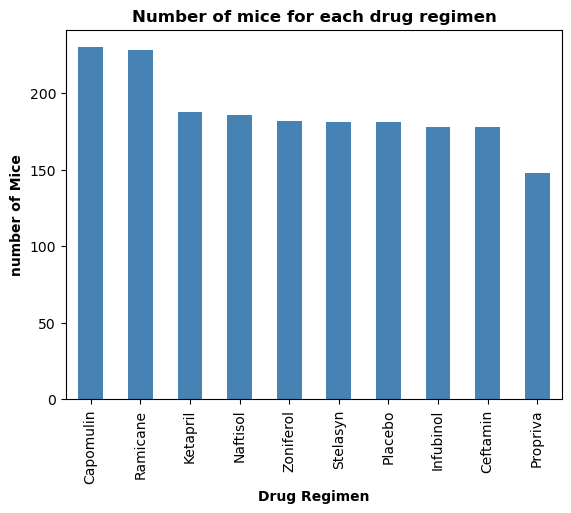

In [251]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plot_pandas = mice_count_regimen.plot.bar(color='steelblue', align = "center")

# add details: xlable, ylabel, and title
plt.xlabel("Drug Regimen",fontweight = 'bold')
plt.ylabel ("number of Mice", fontweight = 'bold')
plt.title ("Number of mice for each drug regimen",fontweight = 'bold')
plt.show()

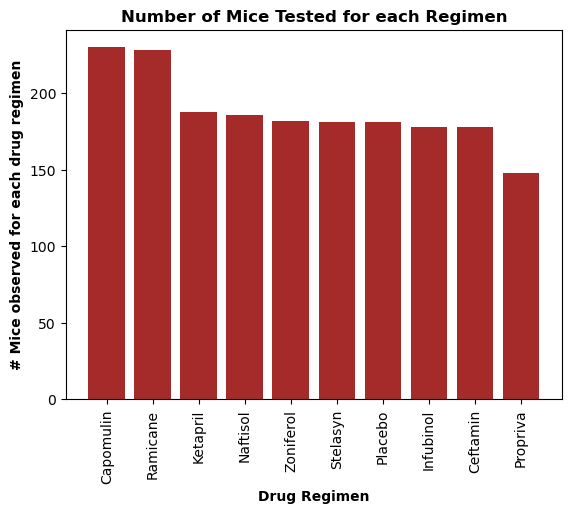

In [278]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count_regimen.index.values
y_axis = mice_count_regimen.values


plt.bar(x_axis, y_axis, color='brown', align='center')

plt.title("Number of Mice Tested for each Regimen", fontweight = 'bold')
plt.xlabel('Drug Regimen',fontweight = 'bold')
plt.ylabel('# Mice observed for each drug regimen',fontweight = 'bold' )
plt.xticks(rotation="vertical")
plt.show()


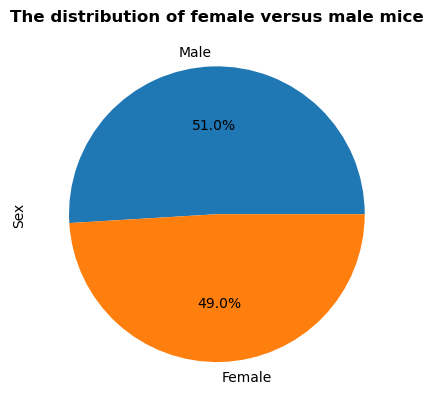

In [285]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_based_data = merged_clean_df['Sex'].value_counts()
sex_based_data.plot.pie(autopct= "%1.1f%%")

plt.title("The distribution of female versus male mice", fontweight='bold')
plt.show()

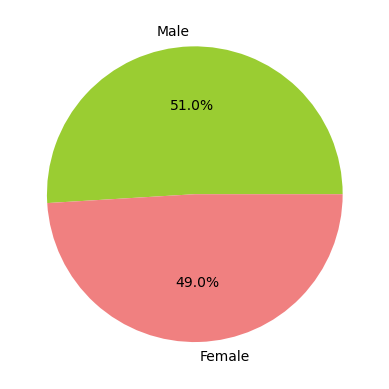

In [297]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ['Male', 'Female']
colors = ["yellowgreen","lightcoral",]
plt.pie(sex_based_data, labels=sex, colors=colors,autopct="%1.1f%%", startangle=360)
plt.show()

## Quartiles, Outliers and Boxplots

In [376]:

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = merged_clean_df.groupby('Mouse ID')['Timepoint'].max().sort_values().reset_index().rename(columns={'Timepoint': 'max_timepoint'})

# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#merge max_timepoint to merged_clean_df
mergedata_df = pd.merge(merged_clean_df, max_timepoint_df, on = 'Mouse ID')
mergedata_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),max_timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45


In [402]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Create subset dataframe representing only the four following drug regimens
# ***NOTE*** must run previous cells in order for this cell to work

Drug_Regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
Treatment = []

# Locate each drug from our list 'drugs' in the orginal dataframe
for drug in Drug_Regimen:
    
    temp_df = mergedata_df.loc[mergedata_df['Drug Regimen'] == drug]

    # Create subset dataframes that narrow down to rows only containing the final timepoint for each regimen
    final_volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df['max_timepoint']]
    
    # Create a series that consists of all final volume values for each regimen
    vol_values = final_volume_df['Tumor Volume (mm3)']
    Treatment.append(vol_values)
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # Determine outliers using upper and lower bounds
    outliers_count = (vol_values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')

IQR for Capomulin: 15.577752179999997
Lower Bound for Capomulin: 25.355449580000002
Upper Bound for Capomulin: 87.66645829999999
Number of Capomulin outliers: 1
IQR for Ramicane: 15.577752179999997
Lower Bound for Ramicane: 25.355449580000002
Upper Bound for Ramicane: 87.66645829999999
Number of Ramicane outliers: 1
IQR for Infubinol: 15.577752179999997
Lower Bound for Infubinol: 25.355449580000002
Upper Bound for Infubinol: 87.66645829999999
Number of Infubinol outliers: 0
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


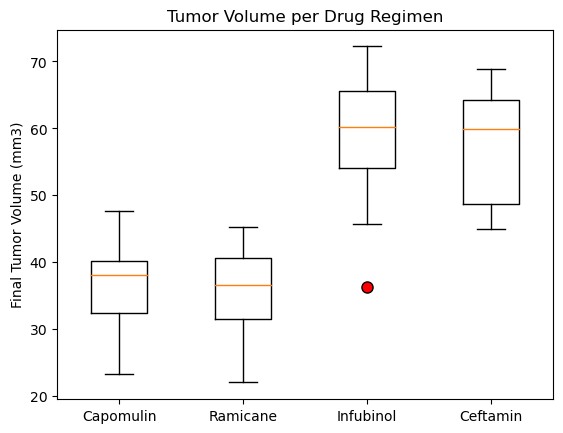

In [414]:
# checking outlier appearance
frops = dict (marker ='o',markerfacecolor='r',markersize=8,markeredgecolor='black')

# Plot boxplot
plt.boxplot(Treatment,flierprops=frops)

# Add title and labels to boxplot
plt.title('Tumor Volume per Drug Regimen')

plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3,4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

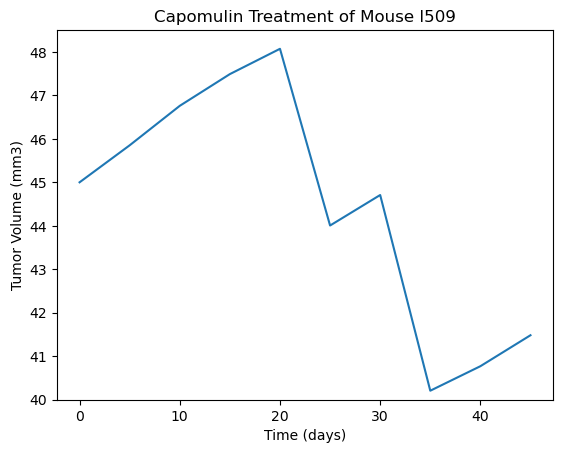

In [436]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Identify data points of a mouse treated with Capomulin
mouse = merged_clean_df.loc[merged_clean_df['Mouse ID'] == 'l509']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = 'o' adds circles on each data point for visibility
plt.plot(A_mouse['Timepoint'], mouse['Tumor Volume (mm3)'])

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.ylim(40,48.5)

# Display plot
plt.show()

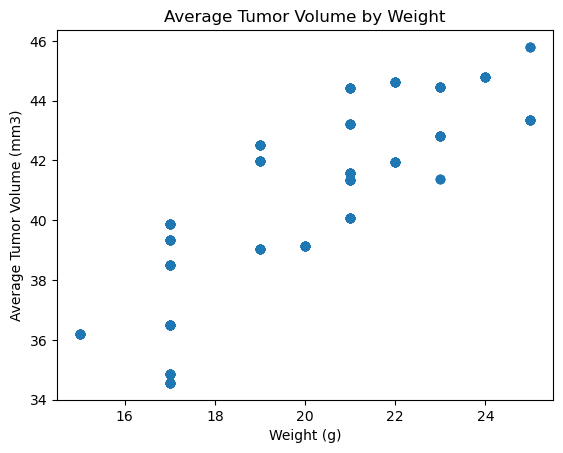

In [461]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# get data where only Capomulin regimen was used
capomulin_df = merged_clean_df.loc[merged_clean_df['Drug Regimen'] == 'Capomulin']

# determine average tumor volume for each mouse
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values().reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'}))



# Merge average tumor volume onto capomulin_df and drop duplicates
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')


x_axis = avg_vol_df['Weight (g)']
y_axis = avg_vol_df['avg_tumor_vol']

# Generate scatter plot using ax_axis and y_axis
plt.scatter(x_axis, y_axis)


# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()


## Correlation and Regression

The correlation between mouse weight and tumor vol is 0.83
The r-squared is: 0.7


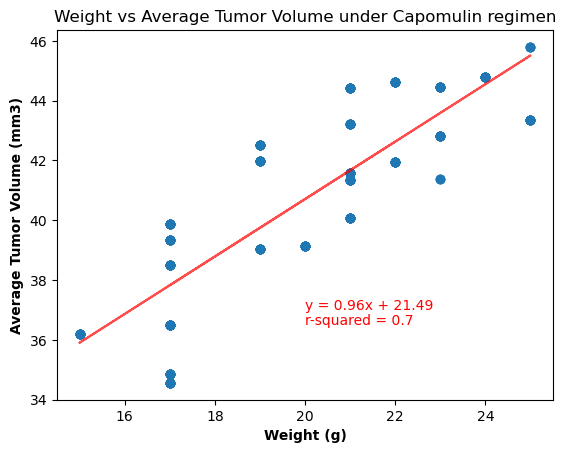

In [485]:
# Calculate the correlation coefficient and linear regression model 
#for mouse weight and average tumor volume for the Capomulin regimen

# The code is similar to one above for scatter plot
capomulin_df = merged_clean_df.loc[merged_clean_df['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')

# Define the values of x, y
x = avg_vol_df ['Weight (g)']
y = avg_vol_df ['avg_tumor_vol']


# Calculate the correlation
correlation = round(st.pearsonr(x, y)[0],2)
print(f"The correlation between mouse weight and tumor vol is {correlation}")

# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)


# Calculate r-squared
r_squared = round(rvalue**2,2)
print(f"The r-squared is: {r_squared}")

# y = mx + b
regress_values = x * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(x,y)
plt.plot(x,regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(line_equation,(20,37), color="red")
plt.annotate(f'r-squared = {r_squared}', (20,36.5), color="red")


# # Define title and x/y labels
plt.title('Weight vs Average Tumor Volume under Capomulin regimen')
plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')
plt.show()
